In [148]:
!pip install transformers

In [27]:
!pip install google-play-scraper

In [29]:
#!pip install -qq google_play_scraper
!pip install -q transformers

In [30]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px


In [36]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
Abba_data = reviews_all('abbadata.com.ng',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)


In [38]:
Abba_data

[{'reviewId': '1304009f-251a-4308-9c2a-dc509d1ec2af',
  'userName': 'Mohd Jibrin',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjXWJEK2JbrtrwurKoUQr6NjcZuLv47rHYeaXhUtwkGUNG9MeM2z',
  'content': 'Hi, its over a week i have trying to recharge my line its not working, i tried data still its not working. I contacted via whatsapp and no reply. U need to work on these issues pls',
  'score': 2,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.0',
  'at': datetime.datetime(2024, 12, 21, 17, 18, 34),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.0.0'},
 {'reviewId': 'a8284f7f-6c84-47bf-a44c-0d62cd3ef830',
  'userName': 'abubakar sadeeq',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjU78O80h0jjLuPYEkpe6xr4s5wlYP-lCbcP8K5Jks2beOypLU_F',
  'content': 'They are 100% scammers',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.0',
  'at': datetime.datetime(2024, 12, 20, 10, 57, 43),
  'replyContent': None,
  'repliedAt': None

In [40]:
# convert the json data into a dataframe
Abba_data_df = pd.json_normalize(Abba_data)

In [42]:
Abba_data_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1304009f-251a-4308-9c2a-dc509d1ec2af,Mohd Jibrin,https://play-lh.googleusercontent.com/a-/ALV-U...,"Hi, its over a week i have trying to recharge ...",2,0,1.0.0,2024-12-21 17:18:34,None,None,1.0.0
1,a8284f7f-6c84-47bf-a44c-0d62cd3ef830,abubakar sadeeq,https://play-lh.googleusercontent.com/a-/ALV-U...,They are 100% scammers,1,0,1.0.0,2024-12-20 10:57:43,None,None,1.0.0
2,294eeaf1-59c8-4e2f-bb31-259a408212da,YAHAYA ABDULLAHI,https://play-lh.googleusercontent.com/a-/ALV-U...,Good application,5,0,1.0.0,2024-12-08 20:15:13,None,None,1.0.0
3,2ec3eb3b-6171-44c6-b807-2810f8d9e552,Aliyu Muhammadkjj,https://play-lh.googleusercontent.com/a-/ALV-U...,Stupid app is not working well and I send i tr...,5,8,1.0.0,2024-11-30 11:33:41,None,None,1.0.0
4,7ea0ed03-768a-4637-b492-39b0fbec1cd9,Orngu Stephen,https://play-lh.googleusercontent.com/a-/ALV-U...,"It's a scam, it's should be removed",1,0,1.0.0,2024-11-29 14:55:10,None,None,1.0.0


In [44]:
Abba_data_df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
48,9d211f95-dbdb-4bcd-8dc9-a0ac019e51e3,AHMAD SHAFIU,https://play-lh.googleusercontent.com/a-/ALV-U...,This is special and fantastic app,4,16,None,2024-02-26 15:34:09,None,None,None
49,4b217f1f-c4ef-4d88-a83f-8464a17e0480,Haliru Ibrahim,https://play-lh.googleusercontent.com/a/ACg8oc...,Charge yayi yawa har naira50,1,35,1.0.0,2023-12-27 10:21:43,None,None,1.0.0
50,3ae84400-f8c4-4322-a7d3-4ed9818855d0,Usman Ayuba,https://play-lh.googleusercontent.com/a/ACg8oc...,Abdullahi ayuba,5,17,1.0.0,2023-12-01 14:57:02,None,None,1.0.0
51,c16250f0-8487-48a2-82b6-74949e8b7c33,Abdulmuminu Shehu Kaura,https://play-lh.googleusercontent.com/a/ACg8oc...,Its good application,5,39,None,2023-11-19 11:47:49,None,None,None
52,775a4768-6977-46d6-a1a8-a5491804fcd9,AA Rasheed,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,13,None,2023-11-08 19:17:35,None,None,None


In [46]:
Abba_data_df.shape

(53, 11)

#### SENTIMENT ANALYSIS

In [56]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = r"C:\Users\NCC\.jupyter"
# save_path =r"C:\Users\NCC\Downloads\Resource Allocation\Abba_data_sentiment_analysis"

In [58]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)


Device set to use cpu
Device set to use cpu


In [154]:
# Test the reused model 
# play with the parameter and see if it works

result = sentiment_analysis_reuse("Mama hanifa is happy")
print(result)

[{'label': 'POSITIVE', 'score': 0.9986438155174255}]


In [62]:
result = sentiment_analysis_reuse("This app is not allow user to restore password and not allow user to contact them I'm feel sad")
print(result)

[{'label': 'NEGATIVE', 'score': 0.999478280544281}]


In [64]:
#removing wildcharacter and cleaning the content column by casting to a str
Abba_data_df['content_new']= Abba_data_df['content'].astype('str')

In [66]:
Abba_data_df['result'] =Abba_data_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [68]:
Abba_data_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,1304009f-251a-4308-9c2a-dc509d1ec2af,Mohd Jibrin,https://play-lh.googleusercontent.com/a-/ALV-U...,"Hi, its over a week i have trying to recharge ...",2,0,1.0.0,2024-12-21 17:18:34,None,None,1.0.0,"Hi, its over a week i have trying to recharge ...","[{'label': 'NEGATIVE', 'score': 0.999498724937..."
1,a8284f7f-6c84-47bf-a44c-0d62cd3ef830,abubakar sadeeq,https://play-lh.googleusercontent.com/a-/ALV-U...,They are 100% scammers,1,0,1.0.0,2024-12-20 10:57:43,None,None,1.0.0,They are 100% scammers,"[{'label': 'NEGATIVE', 'score': 0.999471962451..."
2,294eeaf1-59c8-4e2f-bb31-259a408212da,YAHAYA ABDULLAHI,https://play-lh.googleusercontent.com/a-/ALV-U...,Good application,5,0,1.0.0,2024-12-08 20:15:13,None,None,1.0.0,Good application,"[{'label': 'POSITIVE', 'score': 0.998708128929..."
3,2ec3eb3b-6171-44c6-b807-2810f8d9e552,Aliyu Muhammadkjj,https://play-lh.googleusercontent.com/a-/ALV-U...,Stupid app is not working well and I send i tr...,5,8,1.0.0,2024-11-30 11:33:41,None,None,1.0.0,Stupid app is not working well and I send i tr...,"[{'label': 'NEGATIVE', 'score': 0.999499082565..."
4,7ea0ed03-768a-4637-b492-39b0fbec1cd9,Orngu Stephen,https://play-lh.googleusercontent.com/a-/ALV-U...,"It's a scam, it's should be removed",1,0,1.0.0,2024-11-29 14:55:10,None,None,1.0.0,"It's a scam, it's should be removed","[{'label': 'NEGATIVE', 'score': 0.999486088752..."


In [70]:
# spliting the result into sentiment and score
Abba_data_df['sentiment'] = Abba_data_df['result'].apply(lambda x: (x[0]['label']))
Abba_data_df['score'] = Abba_data_df['result'].apply(lambda x: (x[0]['score']))

In [72]:
Abba_data_df[['content','score','sentiment']]

,content,score,sentiment
0,"Hi, its over a week i have trying to recharge ...",0.999499,NEGATIVE
1,They are 100% scammers,0.999472,NEGATIVE
2,Good application,0.998708,POSITIVE
3,Stupid app is not working well and I send i tr...,0.999499,NEGATIVE
4,"It's a scam, it's should be removed",0.999486,NEGATIVE
5,This app is not allow user to restore password...,0.999478,NEGATIVE
6,"I am not sure if you not scammers, I fund, the...",0.999467,NEGATIVE
7,Network problem,0.998466,NEGATIVE
8,Very annoying app this one star sef is just so...,0.999514,NEGATIVE
9,Muhammadusman,0.947599,NEGATIVE


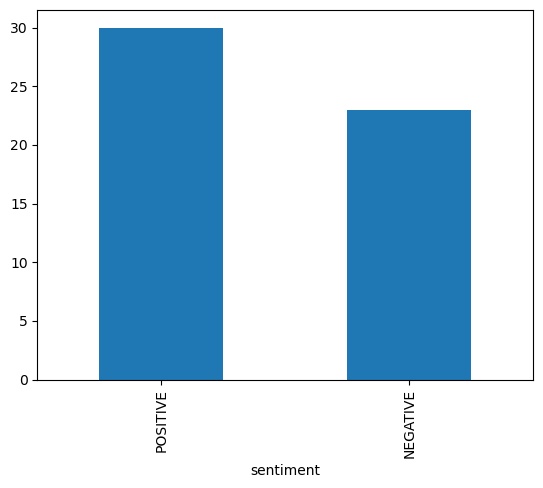

In [74]:
Abba_data_df['sentiment'].value_counts().plot(kind='bar');

#### TOPIC MODELLING

In [134]:
#generate a series for the reviews
feature_google=Abba_data_df['content']
print(feature_google.size)
feature_google.head()

53


0    Hi, its over a week i have trying to recharge ...
1                               They are 100% scammers
2                                     Good application
3    Stupid app is not working well and I send i tr...
4                  It's a scam, it's should be removed
Name: content, dtype: object

In [79]:
# Import the necessary libraries
!pip install textblob
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())


0    Hi, its over a week i have trying to recharge ...
1                               They are 100% scammers
2                                     Good application
3    Stupid app is not working well and I send i tr...
4                  It's a scam, it's should be removed
Name: content, dtype: object


In [81]:
!pip install bertopic

In [85]:
from bertopic import BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.astype(str))

In [87]:
# Create a BERTopic instance
topic_model = BERTopic()

# Fit the model with your data
topics, probs = topic_model.fit_transform(feature_google.astype(str))
feature_google = feature_google.astype(str)

In [89]:
# Now retrieve the topic information
# topic_info = topic_model.get_topic_info()
# print(topic_info.head(10))

   Topic  Count                              Name  \
0     -1     17          -1_abbadata_is_good_very   
1      0     26                 0_and_app_is_data   
2      1     10  1_application_good_the_fantastic   

                                      Representation  \
0  [abbadata, is, good, very, har, kuma, wllh, mu...   
1   [and, app, is, data, not, the, to, my, this, in]   
2  [application, good, the, fantastic, its, is, v...   

                                 Representative_Docs  
0  [This app it's very easy and realliable..for u...  
1  [I can't even give them one star because they'...  
2  [Good application, Its good application, I per...  


In [142]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,17,-1_abbadata_is_good_very,"[abbadata, is, good, very, har, kuma, wllh, mu...",[This app it's very easy and realliable..for u...
1,0,26,0_and_app_is_data,"[and, app, is, data, not, the, to, my, this, in]",[I can't even give them one star because they'...
2,1,10,1_application_good_the_fantastic,"[application, good, the, fantastic, its, is, v...","[Good application, Its good application, I per..."


In [ ]:
# !pip install bertopic
# from bertopic import BERTopic

# topic_model = BERTopic()
# topics, probs = topic_model.fit_transform(feature_google.astype(str))

# from bertopic import BERTopic

# Create a BERTopic instance
#topic_model = BERTopic()

# Fit the model with your data
#topics, probs = topic_model.fit_transform(feature_google.astype(str))
#feature_google = feature_google.astype(str)


# Now retrieve the topic information
# topic_info = topic_model.get_topic_info()
print(topic_info.head(10))


In [ ]:
# topic_model.get_topic_info().head(10)

In [99]:
Abba_data_df.columns


Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [101]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
Abba_data_df.to_excel(output_file, index=False)

In [103]:
pip install mysql-connector-python --upgrade


   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.1 MB 1.5 MB/s eta 0:00:11
   - -------------------------------------- 0.8/16.1 MB 1.4 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/16.1 MB 1.8 MB/s eta 0:00:09
   ---- ----------------------------------- 1.8/16.1 MB 2.1 MB/s eta 0:00:07
   ----- ---------------------------------- 2.4/16.1 MB 2.2 MB/s eta 0:00:07
   ------- -------------------------------- 3.1/16.1 MB 2.4 MB/s eta 0:00:06
   --------- ------------------------------ 3.7/16.1 MB 2.4 MB/s eta 0:00:06
   ---------- ----------------------------- 4.2/16.1 MB 2.4 MB/s eta 0:00:05
   ----------- ---------------------------- 4.7/16.1 MB 2.5 MB/s eta 0:00:05
   ------------- -------------------------- 5.2/16.1 MB 2.5 MB/s eta 0:00:05
   -------------- -

#### ETL CODE ANALYSIS

In [114]:

dataframe=Abba_data_df

In [116]:

data = [tuple(row) for row in Abba_data_df.to_numpy()]

In [118]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")


Column 'result' contains list values.


In [120]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [122]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [130]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': '1543',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """
    
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Database 'playstore_reviews' does not exist. Creating it...
Database 'playstore_reviews' created successfully!
Table `playstore_reviews` created successfully!
53 rows inserted/updated successfully!
MySQL connection closed.


In [158]:
df = pd.read_excel('playstore_reviews.xlsx')